# Feature Engineering pour Machine Learning Prédictif

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importation du csv DVF

In [2]:
dvf = pd.read_csv('Data/dvf.csv', sep=',', low_memory=False)

## Partie 1 :Feature Engineering & Data Analysis round 2

### Remarques :
Après le premier nettoyage le dataset n'est pas encore prêt à être joué avec un algorithme.   
Il faut faut déterminer les colonnes qui vont être corrélées avec la target. C'est-à-dire qu'il nous faut connaître les colonnes qui vont influencer le prix d'un bien immobilier. Pour cela on va tout d'abord ce remémorer la composition du dataframe.

### Exploration des données

In [3]:
dvf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224142 entries, 0 to 2224141
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id_mutation                object 
 1   date_mutation              object 
 2   nature_mutation            object 
 3   valeur_fonciere            float64
 4   adresse_nom_voie           object 
 5   nom_commune                object 
 6   code_departement           object 
 7   id_parcelle                object 
 8   nombre_lots                int64  
 9   code_type_local            float64
 10  type_local                 object 
 11  surface_reelle_bati        float64
 12  nombre_pieces_principales  float64
 13  surface_terrain            float64
 14  longitude                  float64
 15  latitude                   float64
 16  id_bien                    object 
dtypes: float64(7), int64(1), object(9)
memory usage: 288.5+ MB


In [4]:
dvf.describe()

,valeur_fonciere,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2.224142e+06,2.224142e+06,1.348953e+06,1.223008e+06,1.346962e+06,1.875892e+06,2.171583e+06,2.171583e+06
mean,2.052168e+05,2.253525e-01,1.535372e+00,1.196465e+02,3.315520e+00,1.838143e+03,1.952514e+00,4.639342e+01
std,2.292359e+06,7.998093e-01,8.871148e-01,5.772342e+02,1.988447e+00,8.571996e+03,6.085189e+00,5.414858e+00
min,1.000000e-02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.315233e+01,-2.138595e+01
25%,4.166666e+04,0.000000e+00,1.000000e+00,6.400000e+01,2.000000e+00,2.410000e+02,-1.341860e-01,4.491790e+01
50%,1.200000e+05,0.000000e+00,1.000000e+00,8.800000e+01,4.000000e+00,5.170000e+02,2.266328e+00,4.714500e+01
75%,2.190000e+05,0.000000e+00,2.000000e+00,1.150000e+02,5.000000e+00,1.031000e+03,4.040598e+00,4.871642e+01
max,1.750000e+09,3.300000e+02,4.000000e+00,2.778140e+05,1.120000e+02,3.058525e+06,5.582859e+01,5.108207e+01


### Remarques :
Le describe permet de voir les écarts au sein des des colonnes numériques.  
On remarque ainsi une grande disparité des prix dans la colonne foncière, de 0.01€ à 1 750 000 000€.
Il conviendra surement de faire des fourchettes de prix ou de réduire les données.

In [5]:
dvf.isnull().sum()

id_mutation                        0
date_mutation                      0
nature_mutation                    0
valeur_fonciere                    0
adresse_nom_voie                3087
nom_commune                        0
code_departement                   0
id_parcelle                        0
nombre_lots                        0
code_type_local               875189
type_local                    875189
surface_reelle_bati          1001134
nombre_pieces_principales     877180
surface_terrain               348250
longitude                      52559
latitude                       52559
id_bien                            0
dtype: int64

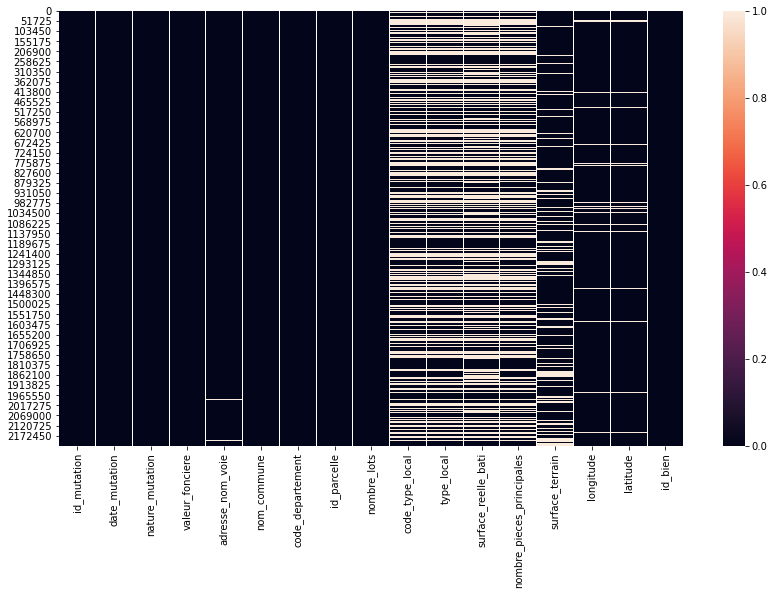

In [6]:
plt.figure(figsize=(14,8))
sns.heatmap(dvf.isnull())

### Remarques :
Cette requête nous informe sur le nombre de Null dans les colonnes, c'est-à-dire le nombre de lignes où les données ne sont pas renseignées.  
On remarque alors qu'il en reste beaucoup, un traitement s'avère nécessaire pour éviter le bruit dans les données se qui conduira à des résultats faussés.

### En conlusion : 
Il faut:
  * traiter les NaN : afin d'en faire une catégorie à part ===> comment / cb de cat 
  * voir pour ne garder que les colonnes qui sont corrélées à la target : `valeur_fonciere`
  * supprimer les données `nature_mutation` qui ne sont pas égales à des Ventes pour coller au besoin du client
  * créer une fourchette de prix

#### Récupération des données de vente seulement 

In [7]:
dvf['nature_mutation'].unique()

array(['Vente', 'Echange', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement", 'Adjudication',
       'Expropriation'], dtype=object)

In [8]:
dvf2 = dvf.loc[dvf['nature_mutation'].isin(['Vente','Vente terrain à bâtir',"Vente en l'état futur d'achèvement"])]

In [9]:
dvf2['nature_mutation'].unique()

array(['Vente', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement"], dtype=object)

### Remarque:
Le nouveau dataframe n'a maintenant que les ventes de biens ce qui permet de coller au mieux à la demande du client qui est de "faire une estimation des biens de vente". 

#### Traitement des NaN de la colonne `type_local`

In [10]:
dvf2['type_local'] = dvf2['type_local'].fillna('None')

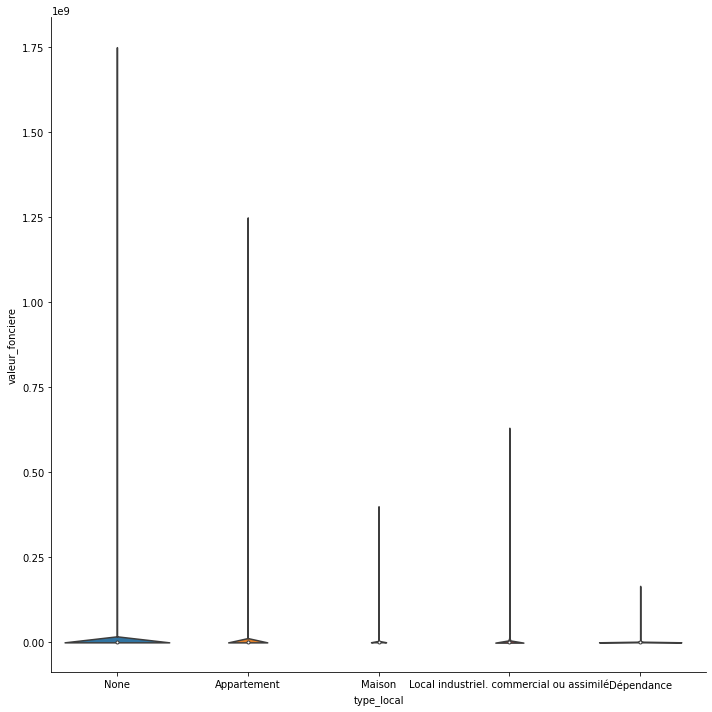

In [11]:
sns.catplot(x="type_local",y="valeur_fonciere",data=dvf2, kind='violin', height=10)

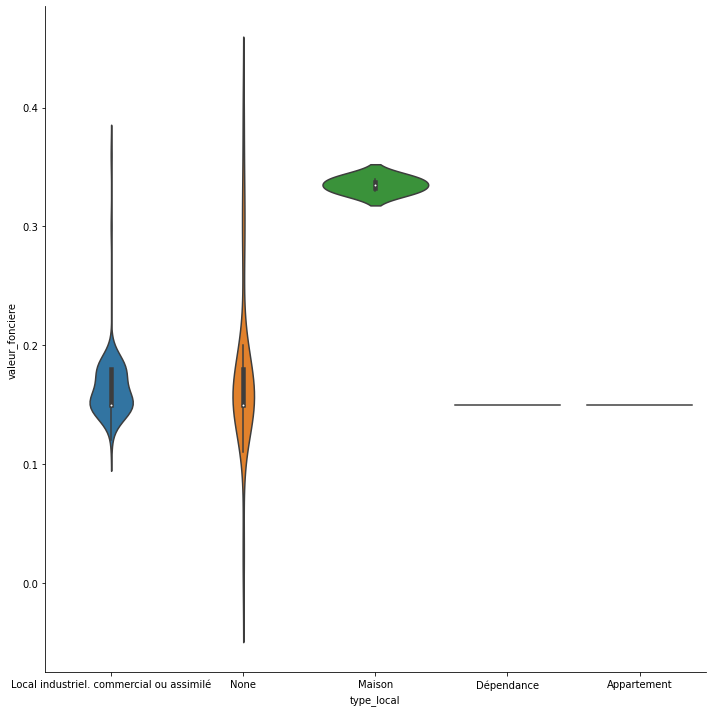

In [12]:
sns.catplot(x="type_local",y="valeur_fonciere",data=dvf2[dvf2['valeur_fonciere']<0.5], kind='violin', height=10)

### Remarques

Dans la colonne `type_local` 'None' se rapprochent plus de 'Local industriel. commercial ou assimilé' on peut donc supposer que les 'None' en sont.

On peut également se poser la question des valeurs extrêmes de `valeur_fonciere`

In [13]:
dvf2['type_local'] = dvf2['type_local'].replace('None', 'Local industriel. commercial ou assimilé')

In [14]:
dvf2['type_local'].unique()

array(['Local industriel. commercial ou assimilé', 'Appartement',
       'Maison', 'Dépendance'], dtype=object)

In [15]:
dvf2['code_type_local'] = dvf2['code_type_local'].fillna(4)

In [16]:
dvf2['code_type_local'].unique()

array([4., 2., 1., 3.])

In [17]:
dvf2['nombre_pieces_principales'] = dvf2['nombre_pieces_principales'].fillna(0)

### Etude de la corrélation
* si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
* si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
* si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation.

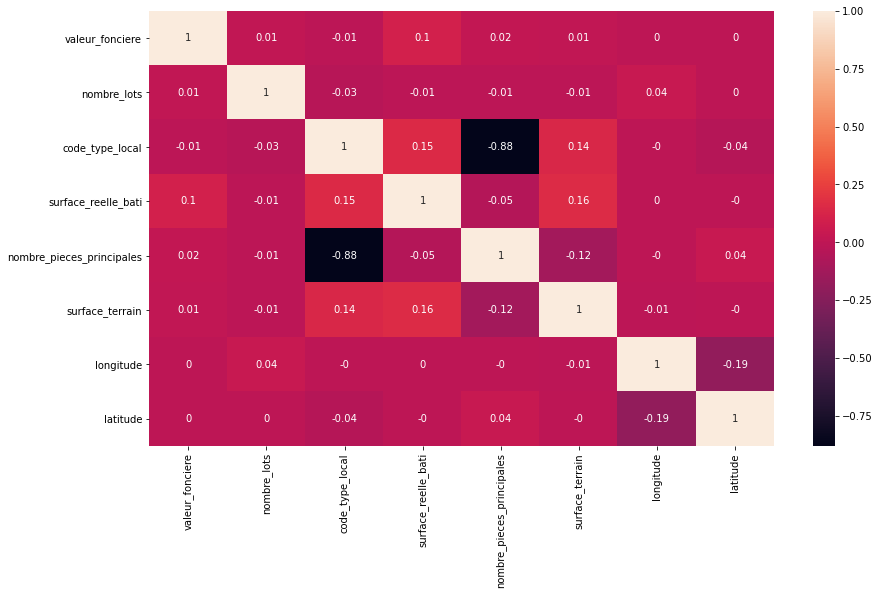

In [18]:
dvf_corr = dvf2.corr().round(2)
plt.figure(figsize=(14,8))
sns.heatmap(data=dvf_corr, annot=True)

### Remarques : 

* Correlation : La matrice montre une forte corrélation négative entre `nombre_pieces_principales` et `code_type_local`
* Feature selection :
    * `valeur_fonciere` qui est la target
    * `code_departement` les départements seront regroupés en régions
    * `nature_mutation`
    * `type_local`
    * `nombre_pieces_principales`


### Mise en place d'un DF final pour les algorithmes


### Création de la colonne `regions`

In [19]:
listeNordEst=['02','08','10', '51', '52', '54', '55', '57','59', '60', '62', '67', '68', '70', '80', '88', '90']
listeNordOuest=['14', '22', '27', '28', '29', '35', '36', '37', '41', '44', '45', '49', '50', '53', '56', '61', '72', '76', '79', '85', '86']
listeSudEst=['01', '03', '04', '05', '06', '13', '18', '21', '25', '26', '38', '39', '42', '58', '69', '71', '73', '74', '83', '84', '89']
listeSudOuest=['2A', '2B', '07', '09', '11', '12', '15', '16', '17', '19', '23', '24', '30', '31', '32', '33', '34', '40', '43', '46', '47', '48', '63', '64', '65', '66', '81', '82', '87']
listeRegionParis=['75', '77', '78', '91', '92', '93', '94', '95']
listeDOMTOM=['971', '972', '973', '974']

In [20]:
dvf2['regions']=np.where(dvf2['code_departement'].isin(listeNordEst), 'NordEst', dvf2['code_departement'])

In [21]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeNordOuest), 'NordOuest', dvf2['regions'])

In [22]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeSudEst), 'SudEst', dvf2['regions'])

In [23]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeSudOuest), 'SudOuest', dvf2['regions'])

In [24]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeRegionParis), 'RegionParis', dvf2['regions'])

In [25]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeDOMTOM), 'DOMTOM', dvf2['regions'])

In [26]:
dvf2.regions.unique()

array(['SudEst', 'NordEst', 'SudOuest', 'NordOuest', 'RegionParis',
       'DOMTOM'], dtype=object)

In [27]:
dvf_prep=dvf2[['valeur_fonciere', 'regions', 'type_local', 'nature_mutation','nombre_pieces_principales']].reset_index(drop=True)
dvf_prep

,valeur_fonciere,regions,type_local,nature_mutation,nombre_pieces_principales
0,115000.0,SudEst,Local industriel. commercial ou assimilé,Vente,0.0
1,1.0,SudEst,Local industriel. commercial ou assimilé,Vente,0.0
2,1.0,SudEst,Local industriel. commercial ou assimilé,Vente,0.0
3,258000.0,SudEst,Appartement,Vente,5.0
4,175050.0,SudEst,Maison,Vente,5.0
...,...,...,...,...,...
2192869,570000.0,RegionParis,Appartement,Vente,2.0
2192870,7698200.0,RegionParis,Appartement,Vente,8.0
2192871,1007640.0,RegionParis,Appartement,Vente,3.0
2192872,626572.0,RegionParis,Appartement,Vente,3.0


In [28]:
dvf_prep.to_csv('dvf2.csv', index=False) 

#### Gestion des Outliers de `valeur_fonciere`

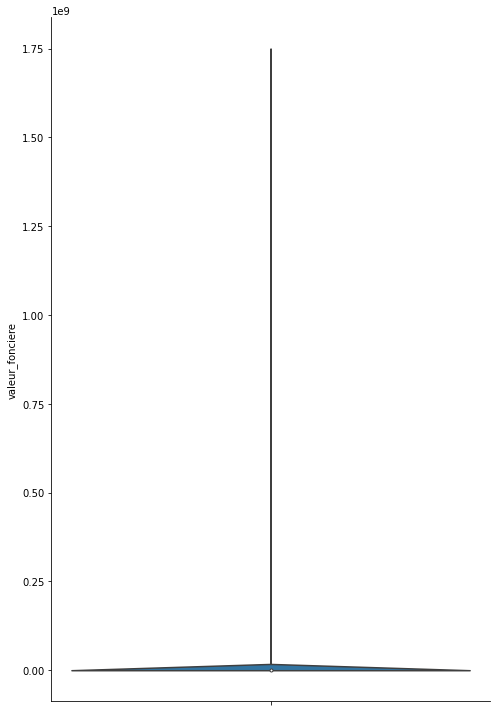

In [29]:
sns.catplot( y="valeur_fonciere",
                data=dvf_prep, kind="violin",
                height=10, aspect=.7)

In [30]:
dvf_prep.valeur_fonciere.describe()

count    2.192874e+06
mean     2.072833e+05
std      2.307654e+06
min      1.000000e-02
25%      4.500000e+04
50%      1.216505e+05
75%      2.200000e+05
max      1.750000e+09
Name: valeur_fonciere, dtype: float64

### Remarques :
Que ça soit par le graphique ou par la méthode ".describe()" il ya une mise ne évidence claire d'une grande variation dans le prix de vente.  
On peut donc choisir de ne prendre les valeurs qu'entre 45 000€ et 220 000€ ce qui correspond aux valeurs comprises entre le 1er et le 3ème quartile.  
Les autres seront considérées comme des outliers.

In [31]:
dvf_prep2 = dvf_prep.loc[dvf_prep['valeur_fonciere'].between(45000, 220000)]
dvf_prep2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103600 entries, 0 to 2192861
Data columns (total 5 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   valeur_fonciere            1103600 non-null  float64
 1   regions                    1103600 non-null  object 
 2   type_local                 1103600 non-null  object 
 3   nature_mutation            1103600 non-null  object 
 4   nombre_pieces_principales  1103600 non-null  float64
dtypes: float64(2), object(3)
memory usage: 50.5+ MB


In [32]:
dvf_prep2.to_csv('dvf3.csv', index=False) 